## Theory Questions

**1. What is unsupervised learning in the context of machine learning**

Unsupervised learning involves training a model on data without labeled responses. The goal is to find hidden structure, groupings, or patterns in the data, such as clustering similar data points together.

**2. How does K-Means clustering algorithm work**

K-Means partitions the data into k clusters by minimizing the variance within each cluster. It iteratively assigns points to the nearest centroid and updates centroids based on the mean of assigned points.

**3. Explain the concept of a dendrogram in hierarchical clustering**

A dendrogram is a tree-like diagram that records the sequences of merges or splits in hierarchical clustering, visually representing how clusters are formed.

**4. What is the main difference between K-Means and Hierarchical Clustering**

K-Means is a partitional algorithm that requires a predefined number of clusters, while hierarchical clustering builds a hierarchy of clusters without needing to specify the number in advance.

**5. What are the advantages of DBSCAN over K-Means**

DBSCAN can find arbitrarily shaped clusters, does not require specifying the number of clusters, and can identify noise or outliers.

**6. When would you use Silhouette Score in clustering**

Silhouette Score is used to evaluate the quality of clustering by measuring how similar a point is to its own cluster compared to other clusters.

**7. What are the limitations of Hierarchical Clustering**

It is computationally expensive, not scalable for large datasets, and once a merge or split is made, it cannot be undone.

**8. Why is feature scaling important in clustering algorithms like K-Means**

Clustering algorithms are distance-based, so unscaled features can bias the algorithm. Scaling ensures all features contribute equally.

**9. How does DBSCAN identify noise points**

DBSCAN marks a point as noise if it does not belong to any cluster, which happens when it has fewer than the minimum required neighboring points within a given radius.

**10. Define inertia in the context of K-Means**

Inertia is the sum of squared distances of samples to their closest cluster center. It is used as a measure of how internally coherent clusters are.

**11. What is the elbow method in K-Means clustering**

The elbow method involves plotting inertia against different values of k to identify a 'knee' point where the rate of decrease sharply shifts, suggesting the optimal number of clusters.

**12. Describe the concept of 'density' in DBSCAN**

Density refers to the number of points within a specified radius (epsilon). DBSCAN uses this to form dense regions as clusters.

**13. Can hierarchical clustering be used on categorical data**

Yes, with appropriate distance measures like Hamming distance, hierarchical clustering can be used on categorical data.

**14. What does a negative Silhouette Score indicate**

A negative Silhouette Score means that a sample is likely assigned to the wrong cluster, as it is closer to a neighboring cluster than its own.

**15. Explain the term 'linkage criteria' in hierarchical clustering**

Linkage criteria determine how the distance between clusters is calculated, such as single, complete, or average linkage.

**16. Why might K-Means clustering perform poorly on data with varying cluster sizes or densities**

K-Means assumes clusters of similar size and density; thus, it may split or merge clusters incorrectly if those assumptions are violated.

**17. What are the core parameters in DBSCAN, and how do they influence clustering**

`eps` defines the neighborhood radius and `min_samples` the minimum points to form a dense region. They control cluster density and noise detection.

**18. How does K-Means++ improve upon standard K-Means initialization**

K-Means++ improves the selection of initial centroids by spreading them out, leading to better convergence and cluster quality.

**19. What is agglomerative clustering**

Agglomerative clustering is a type of hierarchical clustering that starts with individual points and merges the closest pairs iteratively.

**20. What makes Silhouette Score a better metric than just inertia for model evaluation?**

Silhouette Score considers both cohesion and separation, giving a more comprehensive view of cluster quality than inertia alone.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons, make_circles, load_iris, load_wine, load_breast_cancer, load_digits
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import pairwise_distances_argmin_min
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')


## Practical Questions

### Q1. 1. Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a scatter plot

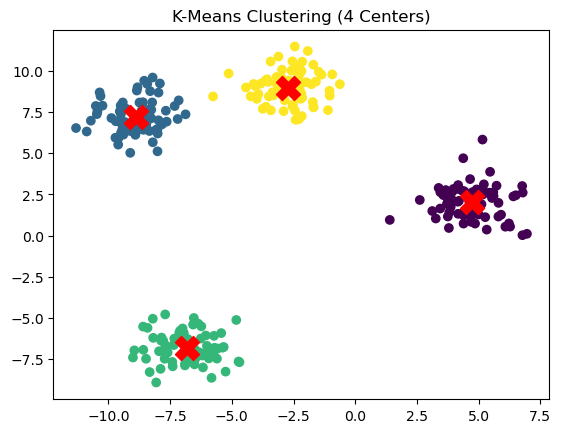

In [2]:

from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4, random_state=42)
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title('K-Means Clustering (4 Centers)')
plt.show()


### Q2. 2. Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 predicted labels

In [3]:
iris = load_iris()
X = iris.data
feature_names = iris.feature_names
df = pd.DataFrame(X, columns=feature_names)

agglo = AgglomerativeClustering(n_clusters=3)
df['Cluster'] = agglo.fit_predict(X)

print("First 10 predicted labels:", df['Cluster'][:10])
df

First 10 predicted labels: 0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: Cluster, dtype: int64


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Q3. 3. Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot

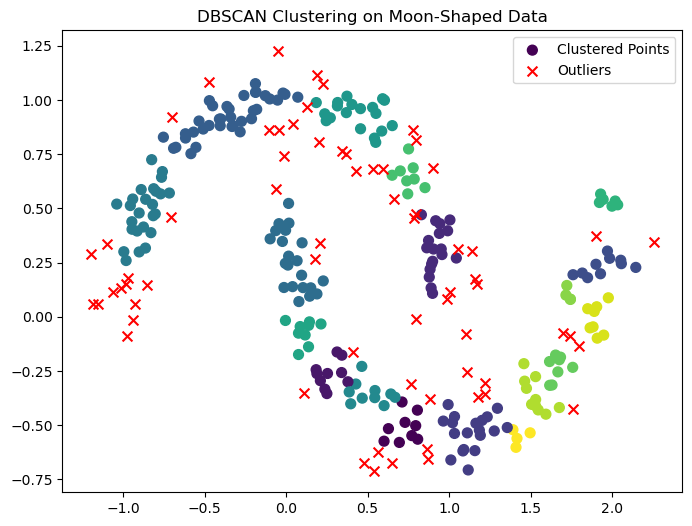

In [4]:
X, y = make_moons(n_samples=300, noise=0.1, random_state=0)

dbscan = DBSCAN(eps=0.1, min_samples=5)
labels = dbscan.fit_predict(X)

plt.figure(figsize=(8, 6))
outliers = labels == -1
clusters = labels != -1

plt.scatter(X[clusters, 0], X[clusters, 1], c=labels[clusters], cmap='viridis', s=50, label='Clustered Points')
plt.scatter(X[outliers, 0], X[outliers, 1], c='red', s=50, marker='x', label='Outliers')

plt.title('DBSCAN Clustering on Moon-Shaped Data')
plt.legend()
plt.show()


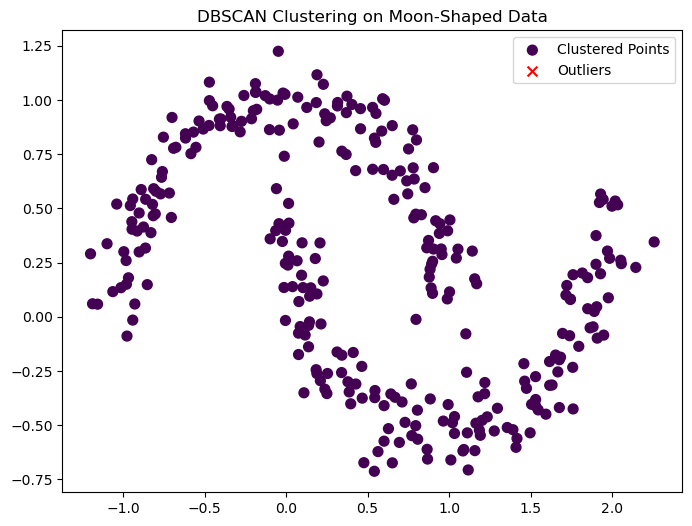

In [5]:
X, y = make_moons(n_samples=300, noise=0.1, random_state=0)

dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

plt.figure(figsize=(8, 6))
outliers = labels == -1
clusters = labels != -1

plt.scatter(X[clusters, 0], X[clusters, 1], c=labels[clusters], cmap='viridis', s=50, label='Clustered Points')
plt.scatter(X[outliers, 0], X[outliers, 1], c='red', s=50, marker='x', label='Outliers')

plt.title('DBSCAN Clustering on Moon-Shaped Data')
plt.legend()
plt.show()


### Q4. 4. Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each cluster

In [6]:
wine = load_wine()
X = wine.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_scaled)

unique, counts = np.unique(labels, return_counts=True)
for cluster, size in zip(unique, counts):
    print(f"Cluster {cluster}: {size} samples")


Cluster 0: 51 samples
Cluster 1: 66 samples
Cluster 2: 61 samples


### Q5. 5. Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result

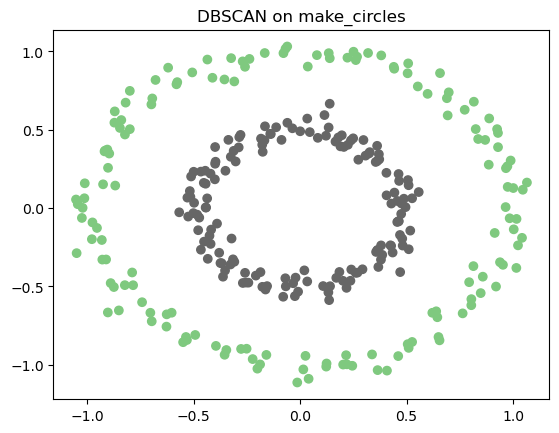

In [7]:

X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05)
db = DBSCAN(eps=0.2, min_samples=5)
labels = db.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Accent')
plt.title('DBSCAN on make_circles')
plt.show()


### Q6. 6. Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster centroids

In [8]:
data = load_breast_cancer()
X = data.data

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_scaled)

print("Cluster centroids:")
print(kmeans.cluster_centers_)

Cluster centroids:
[[0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]
 [0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]]


### Q7. 7. Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with DBSCAN

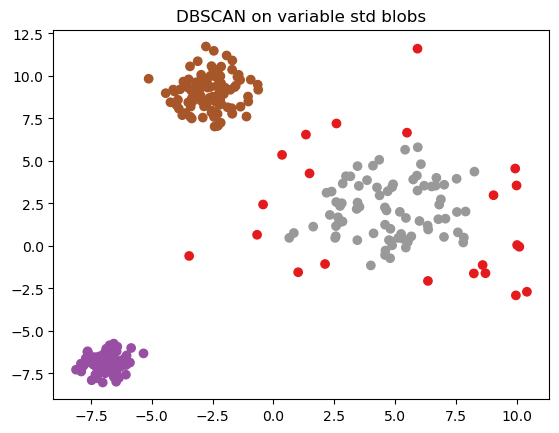

In [9]:

X, _ = make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=42)
db = DBSCAN(eps=1.2, min_samples=5)
labels = db.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Set1')
plt.title("DBSCAN on variable std blobs")
plt.show()


### Q8. 8. Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means

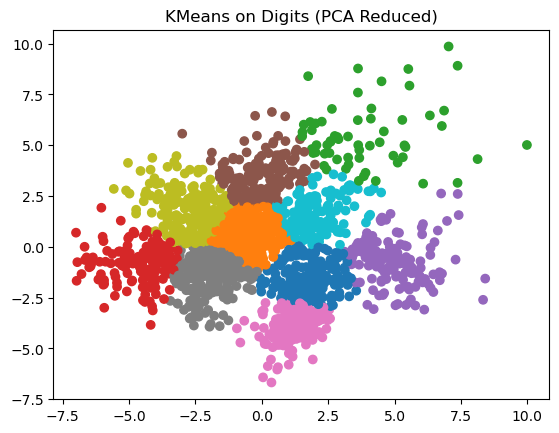

In [10]:
digits = load_digits()
X = StandardScaler().fit_transform(digits.data)
X_pca = PCA(n_components=2).fit_transform(X)
kmeans = KMeans(n_clusters=10, random_state=42).fit(X_pca)
labels = kmeans.labels_

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10')
plt.title("KMeans on Digits (PCA Reduced)")
plt.show()


### Q9. 9. Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart

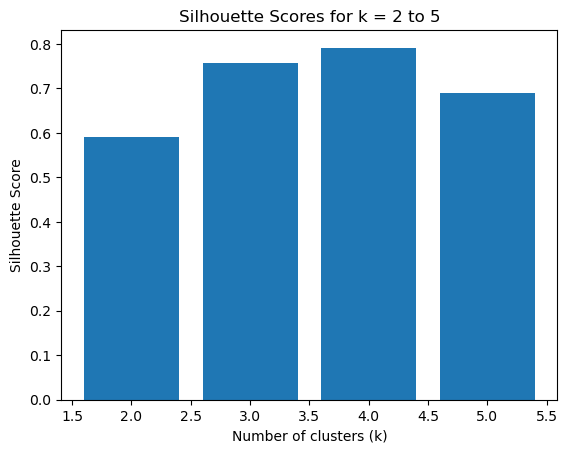

In [11]:

X, _ = make_blobs(n_samples=300, centers=4, random_state=42)
scores = []
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    score = silhouette_score(X, kmeans.labels_)
    scores.append(score)

plt.bar(range(2, 6), scores)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for k = 2 to 5')
plt.show()


### Q10. 10. Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage

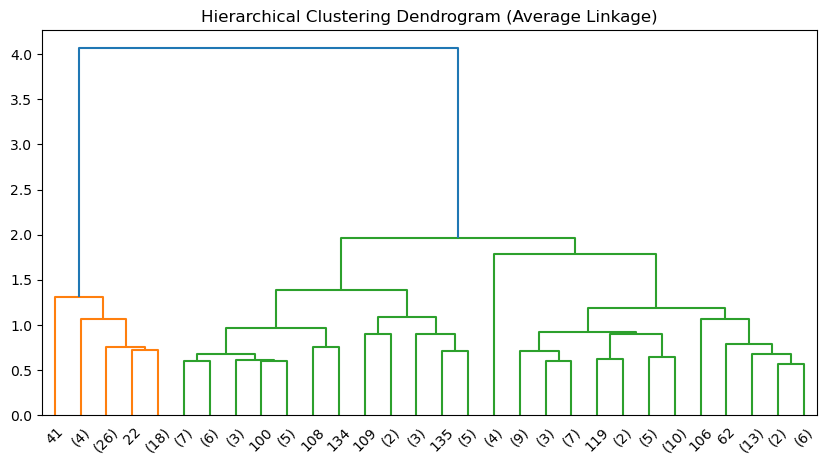

In [12]:

from scipy.cluster.hierarchy import dendrogram, linkage

X = load_iris().data
linked = linkage(X, method='average')

plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='lastp', p=30)
plt.title("Hierarchical Clustering Dendrogram (Average Linkage)")
plt.show()


### Q11. 11. Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with decision boundaries

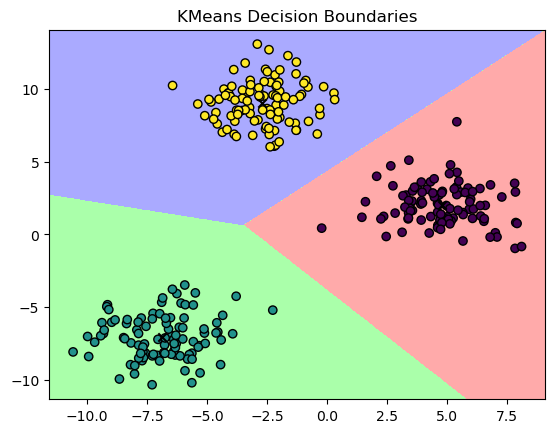

In [13]:

from matplotlib.colors import ListedColormap

X, y = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=1.5)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
h = 0.02

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', c='black')
plt.title("KMeans Decision Boundaries")
plt.show()


### Q12. 12. Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results

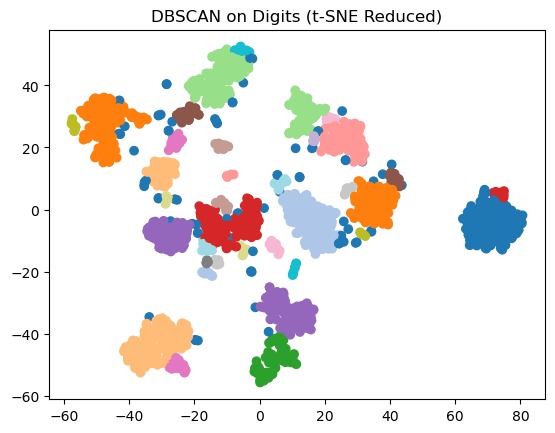

In [14]:

digits = load_digits()
X = StandardScaler().fit_transform(digits.data)
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)
dbscan = DBSCAN(eps=2.0, min_samples=5)
labels = dbscan.fit_predict(X_tsne)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab20')
plt.title("DBSCAN on Digits (t-SNE Reduced)")
plt.show()


### Q13. 13. Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot the result

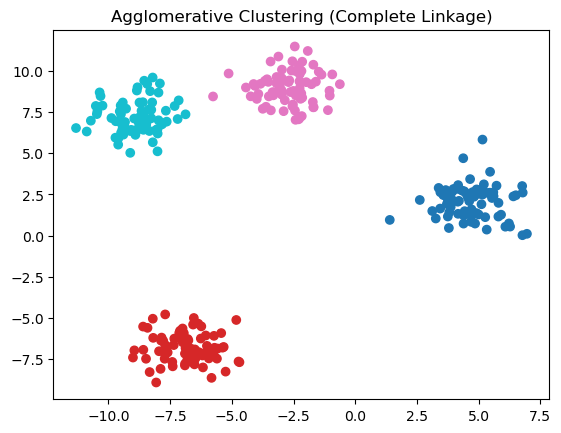

In [15]:

X, _ = make_blobs(n_samples=300, centers=4, random_state=42)
agglo = AgglomerativeClustering(n_clusters=4, linkage='complete')
labels = agglo.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10')
plt.title("Agglomerative Clustering (Complete Linkage)")
plt.show()


### Q14. 14. Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a line plot

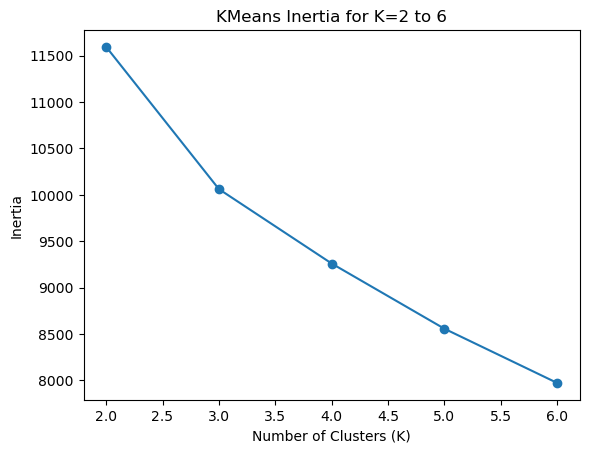

In [16]:

data = load_breast_cancer()
X = StandardScaler().fit_transform(data.data)
inertias = []

for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(range(2, 7), inertias, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("KMeans Inertia for K=2 to 6")
plt.show()


### Q15. 15. Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with single linkage

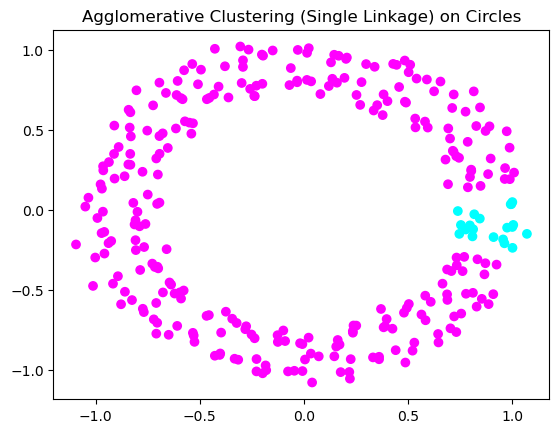

In [17]:

X, _ = make_circles(n_samples=300, noise=0.05)
agglo = AgglomerativeClustering(n_clusters=2, linkage='single')
labels = agglo.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='cool')
plt.title("Agglomerative Clustering (Single Linkage) on Circles")
plt.show()


### Q16. 16. Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding noise)

In [18]:

X = load_wine().data
X_scaled = StandardScaler().fit_transform(X)
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters (excluding noise):", n_clusters)


Number of clusters (excluding noise): 0


### Q17. 17. Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the data points

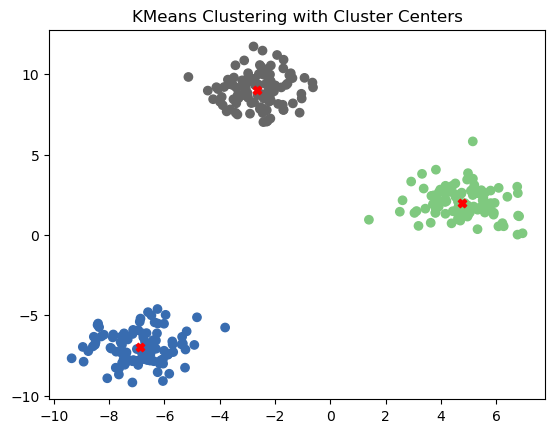

In [19]:

X, _ = make_blobs(n_samples=300, centers=3, random_state=42)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
labels = kmeans.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Accent')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X')
plt.title("KMeans Clustering with Cluster Centers")
plt.show()


### Q18. 18. Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise

In [20]:

X = load_iris().data
X_scaled = StandardScaler().fit_transform(X)
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(X_scaled)
labels = dbscan.labels_

n_noise = np.sum(labels == -1)
print("Number of noise samples:", n_noise)


Number of noise samples: 34


### Q19. 19. Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the clustering result

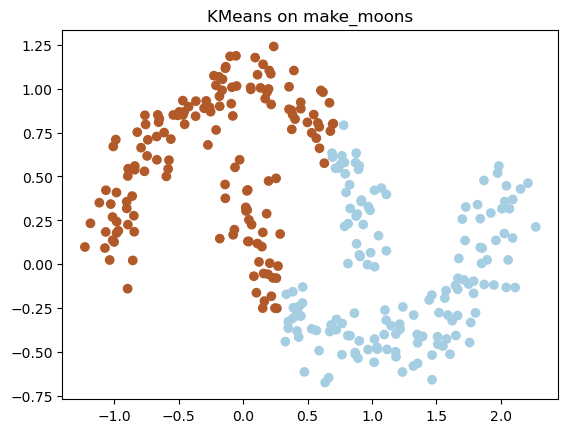

In [21]:

X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Paired')
plt.title("KMeans on make_moons")
plt.show()


### Q20. 20. Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D scatter plot.

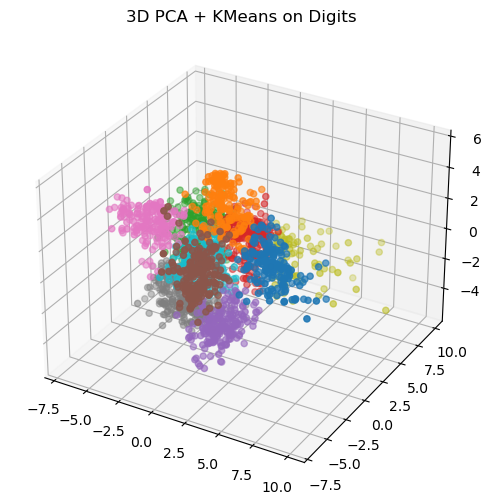

In [22]:

X = load_digits().data
X_scaled = StandardScaler().fit_transform(X)
X_pca = PCA(n_components=3).fit_transform(X_scaled)
kmeans = KMeans(n_clusters=10, random_state=42).fit(X_pca)
labels = kmeans.labels_

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='tab10')
ax.set_title("3D PCA + KMeans on Digits")
plt.show()


# ----------------------Thank You------------------------